**TASK-1 TITANIC SURVIVAL PREDICTION**

Importing the necessary libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import datasets

In [5]:
df = pd.read_csv("/content/tested.csv")

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [8]:
df.shape

(418, 12)

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

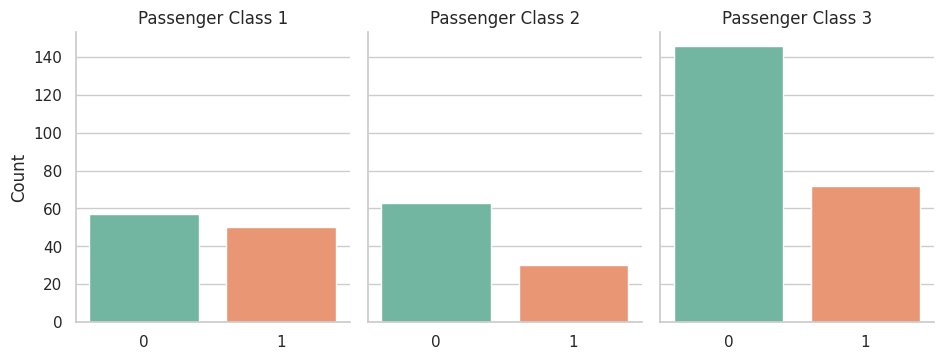

In [34]:
#now visualize the count of survivals rate pclass
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Create the plot
g = sns.catplot(x="Survived", col="Pclass", data=df, kind="count", palette="Set2", height=4, aspect=0.8)

# Set titles and labels
g.set_titles("Passenger Class {col_name}")
g.set_axis_labels("", "Count")

# Show the plot
plt.show()


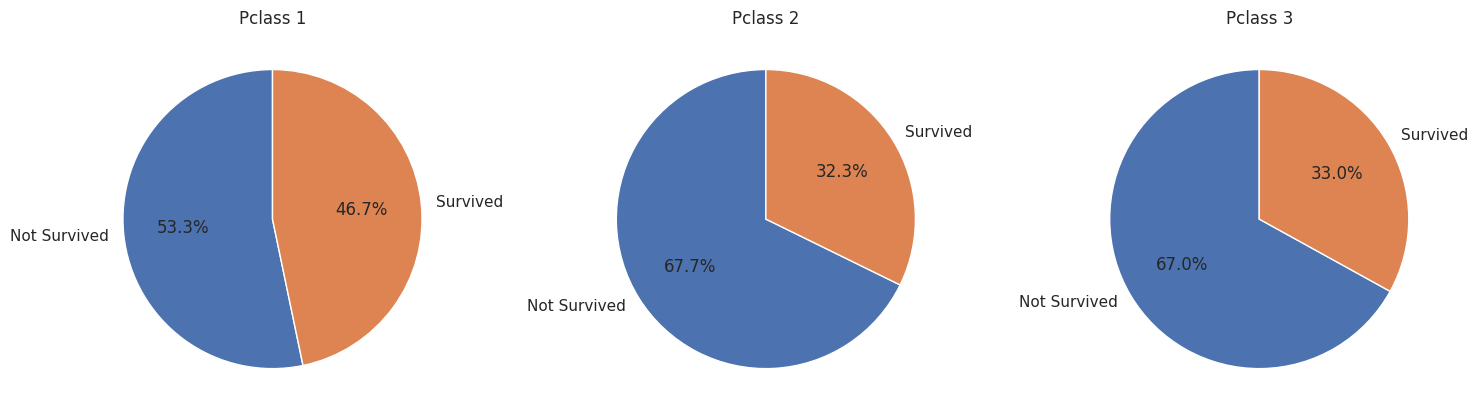

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing 'Survived' and 'Pclass' columns

# Calculate count of survival rates for each passenger class
survival_counts = df.groupby(['Pclass', 'Survived']).size().unstack()

# Plotting pie charts
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns for each passenger class

for i, pclass in enumerate(survival_counts.index, start=1):
    ax = axes[i-1]
    ax.pie(survival_counts.loc[pclass], labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Pclass {pclass}')

plt.tight_layout()
plt.show()


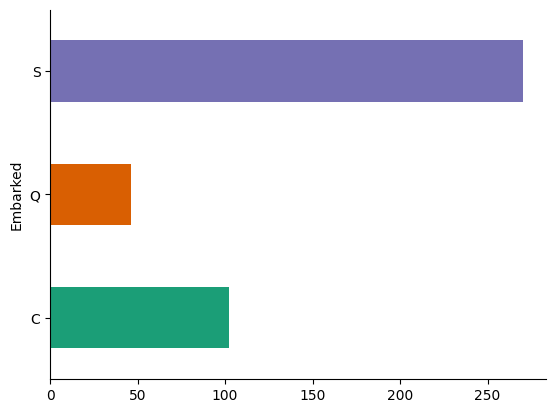

In [29]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Embarked').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [12]:
df["Sex"]

0        male
1      female
2        male
3        male
4      female
        ...  
413      male
414    female
415      male
416      male
417      male
Name: Sex, Length: 418, dtype: object

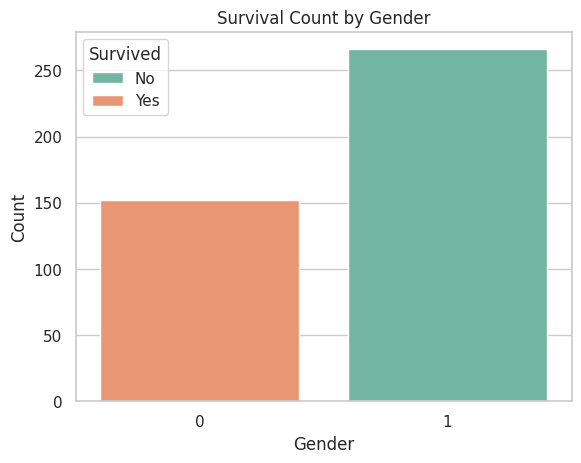

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the countplot
sns.countplot(x=df['Sex'], hue=df["Survived"], palette="Set2")

# Set title and labels
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Show the plot
plt.legend(title="Survived", labels=["No", "Yes"])  # Add legend with custom labels
plt.show()


0 -> Female

1 -> Male

In [40]:
#Look at survival rate by sex
df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
0,1.0
1,0.0


In [15]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [16]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['Sex']= labelencoder.fit_transform(df['Sex'])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


In [17]:
df['Sex'], df['Survived']

(0      1
 1      0
 2      1
 3      1
 4      0
       ..
 413    1
 414    0
 415    1
 416    1
 417    1
 Name: Sex, Length: 418, dtype: int64,
 0      0
 1      1
 2      0
 3      0
 4      1
       ..
 413    0
 414    1
 415    0
 416    0
 417    0
 Name: Survived, Length: 418, dtype: int64)

In [19]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [20]:
df=df.drop(['Age'], axis=1)

Model is Built

In [22]:
X= df[['Pclass', 'Sex']]
Y=df['Survived']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [24]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(random_state = 0)
log.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [25]:
pred = print(log.predict(X_test))

[0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0
 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1
 1 0 0 1 0 1 0 1 0 0]


In [26]:
print(Y_test)

360    0
170    0
224    1
358    0
309    1
      ..
100    1
7      0
22     1
68     0
328    0
Name: Survived, Length: 84, dtype: int64


In [27]:
import warnings
warnings.filterwarnings("ignore")

res= log.predict([[2,1]])

if(res==0):
  print(" Not Survived")
else:
  print("Survived")

 Not Survived


Thank You